# 기계학습 TermProject
### 2018170802 최경석
#### 1) 실험 내용에 대한 전체 요약 
- Dacon의 "월간 데이콘 신용카드 사용자 연체 예측 AI 경진대회"의 데이터 사용 (각 Feature에 대한 자세한 설명은 아래에 있음 )

- EDA를 통한 변수 분포 및 특징 파악

- Feautre들에 대한 전처리 진행
  - Feature Engineering
  - 결측치 처리 (Datawig)
  - Normalization, Label Encoding

- Feature Selection 진행
  - Feature Selection 적용하지 않은 Original Data & Feature Selection 적용한 Data 각각에 대해 Model 구축

- 사용 모델
  - Logistic Regression
  - Random Forest Classifier
  - Support Vector Classifier
  - CatBoost
  - Soft Voting 

- Test data가 주어졌기 떄문에, Train Data를 Train, Validation Set으로 split
- 10 fold Cross Validation을 통한 Model 학습

<br><br>

#### 2) 데이터 출처 및 선정한 데이터에 대한 설명
- 데이터 출처 : https://dacon.io/competitions/official/235713/data 

- 데이터 설명 : EDA 과정에 변수 설명 및 분포 확인




In [ ]:
! pip install datawig
import datawig

In [ ]:
! pip install numpy==1.16.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# 0. 데이터 불러오기

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/open/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/open/test.csv')

In [ ]:
train_df.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [ ]:
test_df.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


# 1. EDA

## 1-1. 변수 설명
index <br>
gender: 성별 <br>
car: 차량 소유 여부 <br>
reality: 부동산 소유 여부 <br>
child_num: 자녀 수 <br>
income_total: 연간 소득 <br>
income_type: 소득 분류 <br>

							['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']

edu_type: 교육 수준 <br>

							['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']

family_type: 결혼 여부 <br>

							['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']

house_type: 생활 방식 <br>

							['Municipal apartment', 'House / apartment', 'With parents',

							 'Co-op apartment', 'Rented apartment', 'Office apartment']

DAYS_BIRTH: 출생일 <br>

							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미

DAYS_EMPLOYED: 업무 시작일 <br>

							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미

							양수 값은 고용되지 않은 상태를 의미함

FLAG_MOBIL: 핸드폰 소유 여부 <br>
work_phone: 업무용 전화 소유 여부 <br>
phone: 전화 소유 여부 <br>
email: 이메일 소유 여부 <br>
occyp_type: 직업 유형 <br>													
family_size: 가족 규모 <br>
begin_month: 신용카드 발급 월 <br>

							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미

credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도 <br>

							=> 낮을 수록 높은 신용의 신용카드 사용자를 의미함

In [ ]:
print(len(train_df))
print(len(test_df))

26457
10000


## 1-2. 결측치 확인

In [ ]:
train_df.isnull().sum()*100 / len(train_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
2022-12-19 04:48:56,671 [INFO]  NumExpr defaulting to 2 threads.


index             0.000000
gender            0.000000
car               0.000000
reality           0.000000
child_num         0.000000
income_total      0.000000
income_type       0.000000
edu_type          0.000000
family_type       0.000000
house_type        0.000000
DAYS_BIRTH        0.000000
DAYS_EMPLOYED     0.000000
FLAG_MOBIL        0.000000
work_phone        0.000000
phone             0.000000
email             0.000000
occyp_type       30.884076
family_size       0.000000
begin_month       0.000000
credit            0.000000
dtype: float64

In [ ]:
test_df.isnull().sum()*100 / len(test_df)

index             0.00
gender            0.00
car               0.00
reality           0.00
child_num         0.00
income_total      0.00
income_type       0.00
edu_type          0.00
family_type       0.00
house_type        0.00
DAYS_BIRTH        0.00
DAYS_EMPLOYED     0.00
FLAG_MOBIL        0.00
work_phone        0.00
phone             0.00
email             0.00
occyp_type       31.52
family_size       0.00
begin_month       0.00
dtype: float64

## 1-3. 변수 분포 확인

Categorical : gender, car, reality, income_type, edu_type, family_type, house_type, FLAG_MOBIL, work_phone, phone, email, occyp_type <br>

Numerical : child_num, income_total, DAYS_BIRTH, DAYS_EMPLOYED, family_size, begin_month <br>

Target : credit


### 1. gender

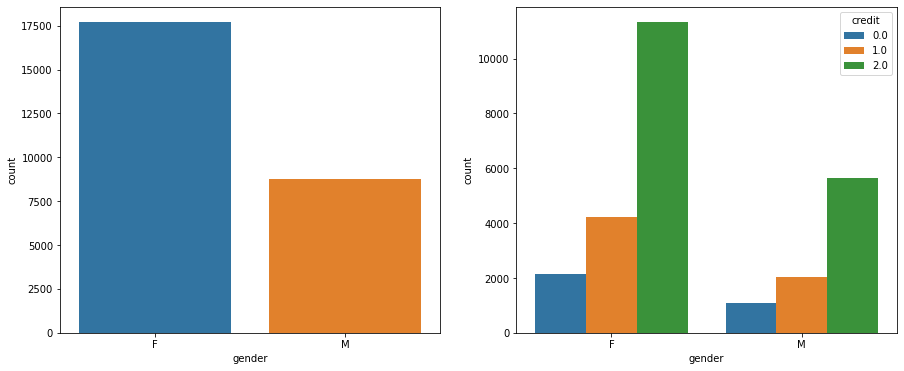

In [ ]:
fig = plt.figure(figsize=(15,6))
ax1 = plt.subplot(1,2,1)
sns.countplot(data=train_df, x="gender", ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.countplot(data=train_df, x="gender", hue='credit', ax=ax2)
plt.show()

### 2. car

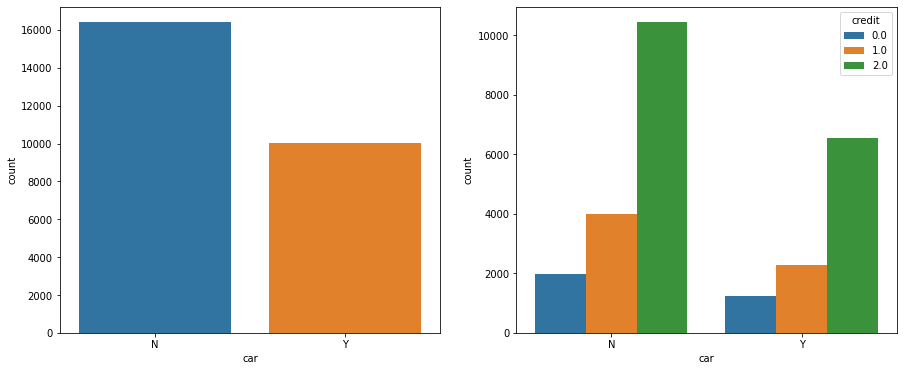

In [ ]:
fig = plt.figure(figsize=(15,6))
ax1 = plt.subplot(1,2,1)
sns.countplot(data=train_df, x="car", ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.countplot(data=train_df, x="car", hue='credit', ax=ax2)
plt.show()

### 3. reality

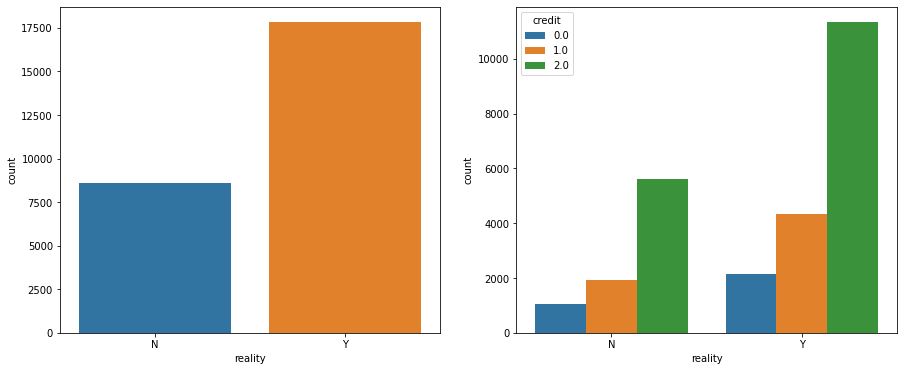

In [ ]:
fig = plt.figure(figsize=(15,6))
ax1 = plt.subplot(1,2,1)
sns.countplot(data=train_df, x="reality", ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.countplot(data=train_df, x="reality", hue='credit', ax=ax2)
plt.show()

### 4. child_num

In [ ]:
train_df['child_num'].unique()

array([ 0,  1,  2,  3,  4,  5, 14, 19,  7])

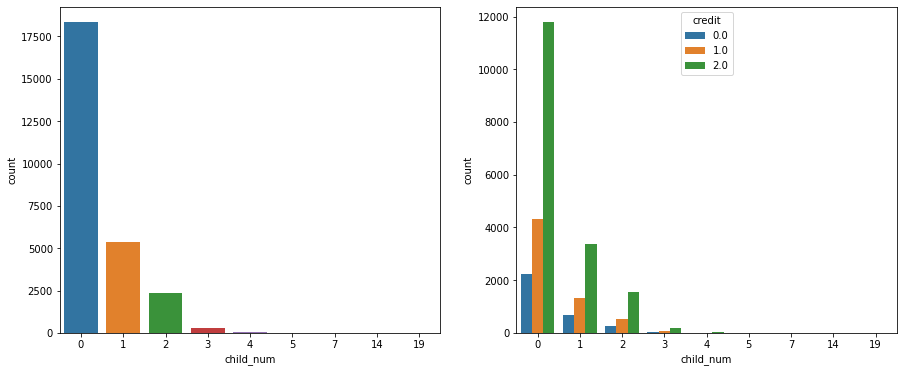

In [ ]:
fig = plt.figure(figsize=(15,6))
ax1 = plt.subplot(1,2,1)
sns.countplot(data=train_df, x="child_num", ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.countplot(data=train_df, x="child_num", hue='credit', ax=ax2)
plt.show()

In [ ]:
# 자녀 수가 19, 14, 7명???
train_df[train_df['child_num']==19]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
10731,10731,F,N,Y,19,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-11057,-1853,1,1,1,0,Waiters/barmen staff,20.0,-5.0,2.0


In [ ]:
train_df[train_df['child_num']==14]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
8462,8462,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,0,0,Drivers,15.0,-7.0,2.0
9021,9021,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,0,0,Drivers,15.0,-58.0,2.0
25390,25390,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,0,0,Drivers,15.0,-43.0,2.0


In [ ]:
train_df[train_df['child_num']==7]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
25313,25313,F,N,N,7,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13827,-1649,1,1,1,0,Cleaning staff,9.0,-26.0,2.0
25638,25638,F,N,N,7,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13827,-1649,1,1,1,0,Cleaning staff,9.0,-31.0,2.0


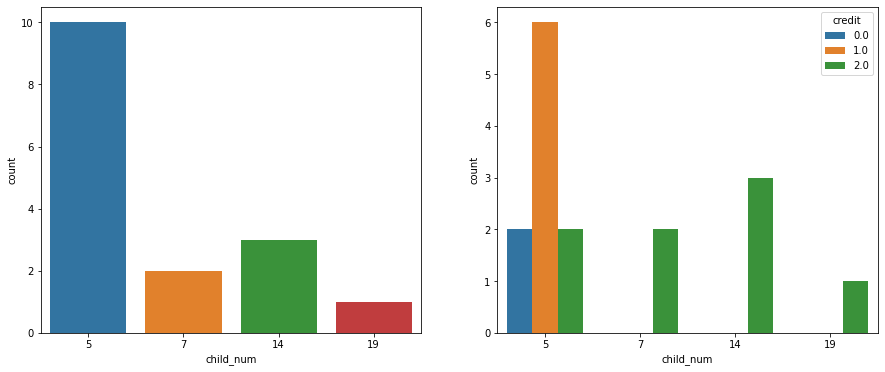

In [ ]:
# 자녀가 5명 이상인 row에 대한 분포
man_child = train_df[train_df['child_num'] >= 5]

fig = plt.figure(figsize=(15,6))
ax1 = plt.subplot(1,2,1)
sns.countplot(data=man_child, x="child_num", ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.countplot(data=man_child, x="child_num", hue='credit', ax=ax2)
plt.show()

### 5. income_total

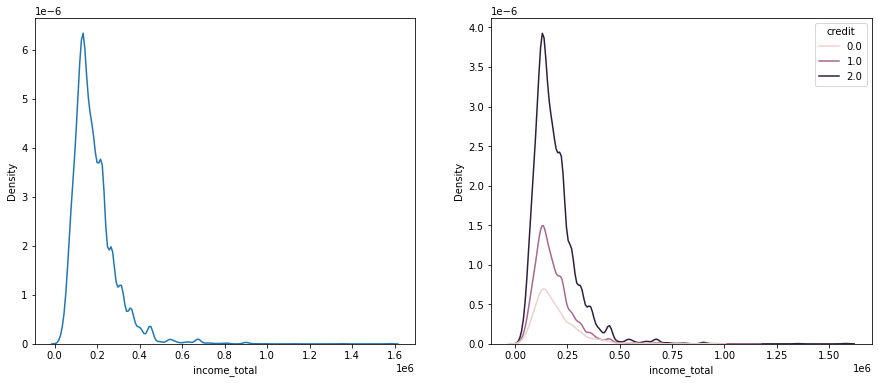

In [ ]:
fig = plt.figure(figsize=(15,6))
ax1 = plt.subplot(1,2,1)
sns.kdeplot(data=train_df, x="income_total", ax=ax1,)
ax2 = plt.subplot(1,2,2)
sns.kdeplot(data=train_df, x="income_total", hue='credit', ax=ax2)
plt.show()

### 6. income_type

In [ ]:
train_df['income_type'].unique()

array(['Commercial associate', 'Working', 'State servant', 'Pensioner',
       'Student'], dtype=object)

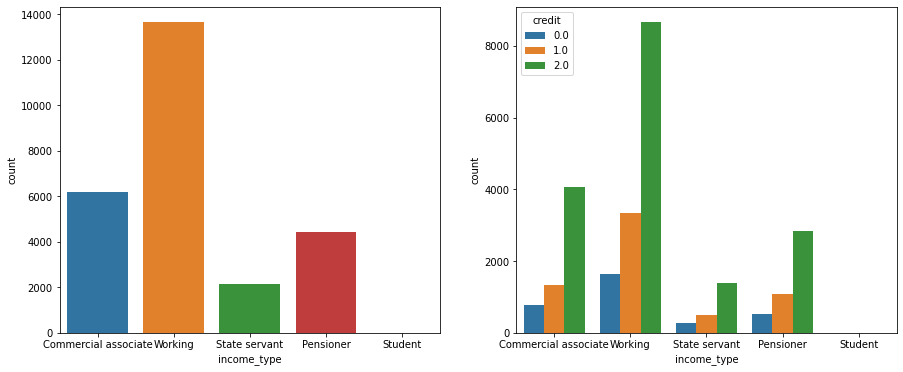

In [ ]:
fig = plt.figure(figsize=(15,6))
ax1 = plt.subplot(1,2,1)
sns.countplot(data=train_df, x="income_type", ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.countplot(data=train_df, x="income_type", hue='credit', ax=ax2)
plt.show()

In [ ]:
train_df['income_type'].value_counts()

Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64

### 7. edu_type

In [ ]:
train_df['edu_type'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

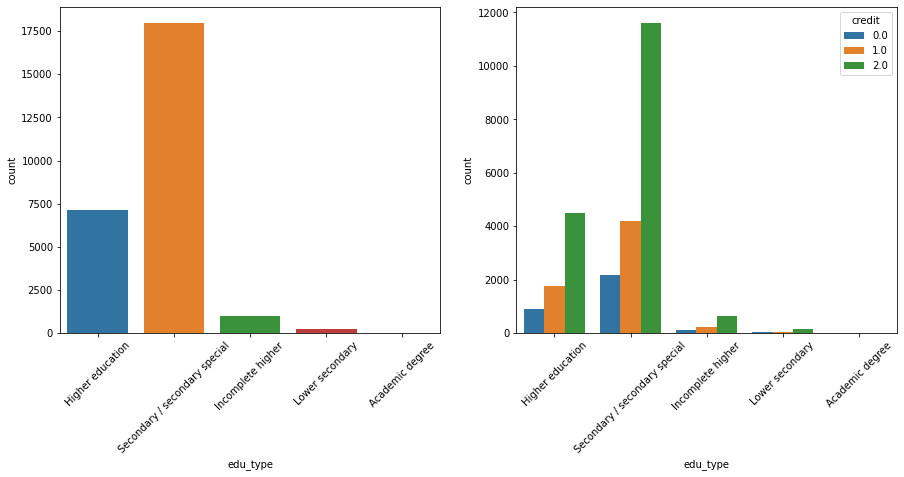

In [ ]:
fig = plt.figure(figsize=(15,6))
ax1 = plt.subplot(1,2,1)
sns.countplot(data=train_df, x="edu_type", ax=ax1)
plt.xticks(rotation=45)
ax2 = plt.subplot(1,2,2)
sns.countplot(data=train_df, x="edu_type", hue='credit', ax=ax2)
plt.xticks(rotation=45)
plt.show()

In [ ]:
train_df['edu_type'].value_counts()

Secondary / secondary special    17995
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academic degree                     23
Name: edu_type, dtype: int64

### 8. family_type

In [ ]:
train_df['family_type'].unique()

array(['Married', 'Civil marriage', 'Separated', 'Single / not married',
       'Widow'], dtype=object)

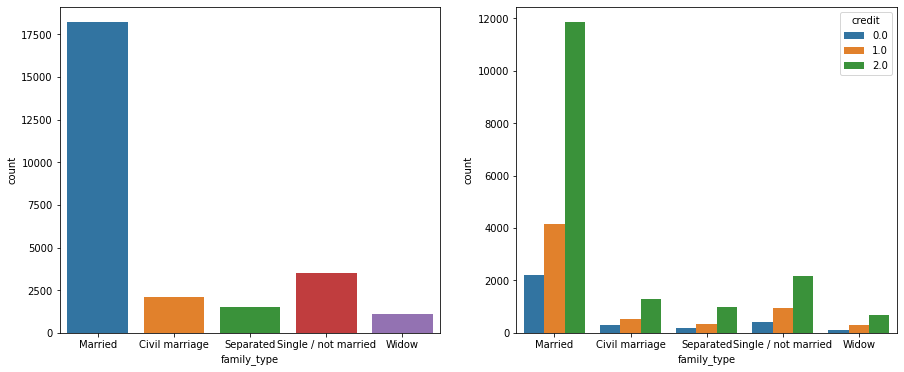

In [ ]:
fig = plt.figure(figsize=(15,6))
ax1 = plt.subplot(1,2,1)
sns.countplot(data=train_df, x="family_type", ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.countplot(data=train_df, x="family_type", hue='credit', ax=ax2)
plt.show()

### 9. house_type

In [ ]:
train_df['house_type'].unique()

array(['Municipal apartment', 'House / apartment', 'With parents',
       'Co-op apartment', 'Rented apartment', 'Office apartment'],
      dtype=object)

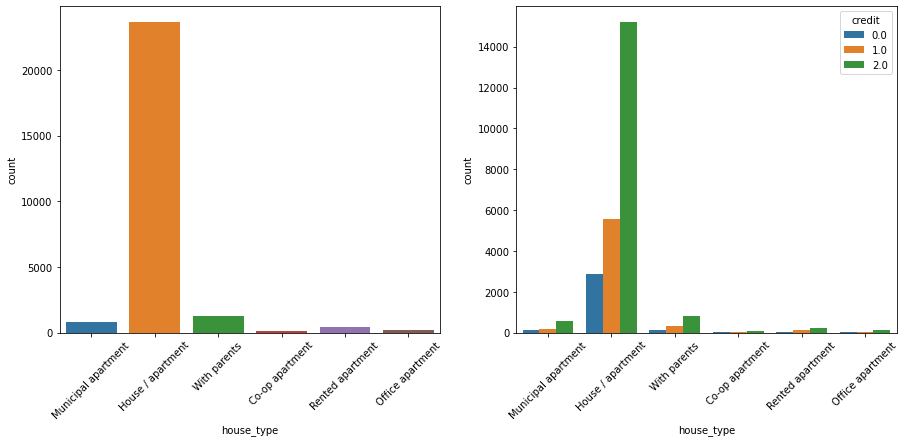

In [ ]:
fig = plt.figure(figsize=(15,6))
ax1 = plt.subplot(1,2,1)
sns.countplot(data=train_df, x="house_type", ax=ax1)
plt.xticks(rotation=45)
ax2 = plt.subplot(1,2,2)
sns.countplot(data=train_df, x="house_type", hue='credit', ax=ax2)
plt.xticks(rotation=45)
plt.show()

### 10. DAYS_BIRTH

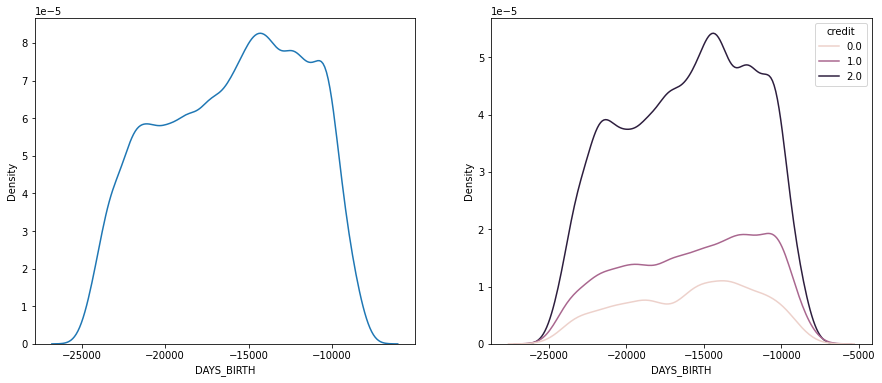

In [ ]:
fig = plt.figure(figsize=(15,6))
ax1 = plt.subplot(1,2,1)
sns.kdeplot(data=train_df, x="DAYS_BIRTH", ax=ax1,)
ax2 = plt.subplot(1,2,2)
sns.kdeplot(data=train_df, x="DAYS_BIRTH", hue='credit', ax=ax2)
plt.show()

### 11. DAYS_EMPLOYED
- 양수값은 고용되지 않은 상태
- 전처리 필요

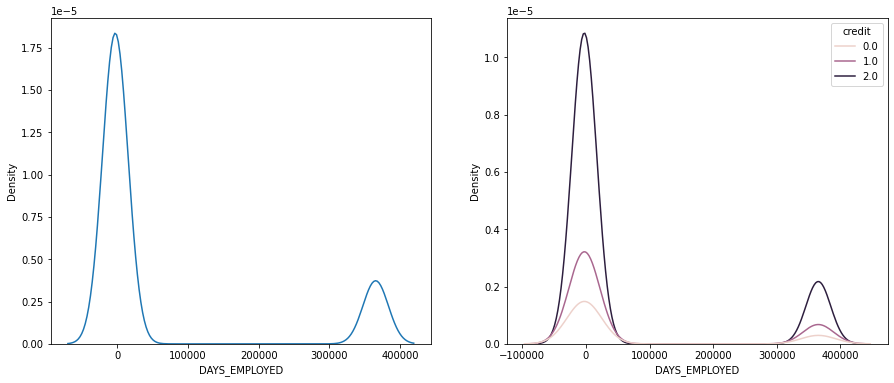

In [ ]:
fig = plt.figure(figsize=(15,6))
ax1 = plt.subplot(1,2,1)
sns.kdeplot(data=train_df, x="DAYS_EMPLOYED", ax=ax1,)
ax2 = plt.subplot(1,2,2)
sns.kdeplot(data=train_df, x="DAYS_EMPLOYED", hue='credit', ax=ax2)
plt.show()

In [ ]:
train_df[train_df['DAYS_EMPLOYED']>=0].head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
14,14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22922,365243,1,0,1,0,NaN,1.0,-41.0,2.0
18,18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23113,365243,1,0,0,0,NaN,2.0,-37.0,2.0
21,21,F,N,N,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21253,365243,1,0,1,0,NaN,2.0,-7.0,2.0
24,24,F,N,N,0,202500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22361,365243,1,0,1,0,NaN,1.0,-5.0,2.0
46,46,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21100,365243,1,0,1,0,NaN,1.0,-24.0,2.0


In [ ]:
print(sorted(train_df['DAYS_EMPLOYED'].unique())[-1])
print(sorted(train_df['DAYS_EMPLOYED'].unique())[-2])

365243
-17


In [ ]:
# DAYS_EMPLOYED가 양수, 즉 고용되지 않은 상태 일때의 DAYS_EMPLOYED는 모두 365243으로 동일
# 해당 값들 0으로 대체 필요

### 12. FLAG_MOBIL

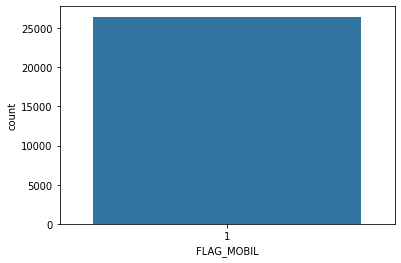

In [ ]:
sns.countplot(data=train_df, x="FLAG_MOBIL")

In [ ]:
# 조사한 모든 사람들이 핸드폰을 소유하고 있음

### 13. work_phone

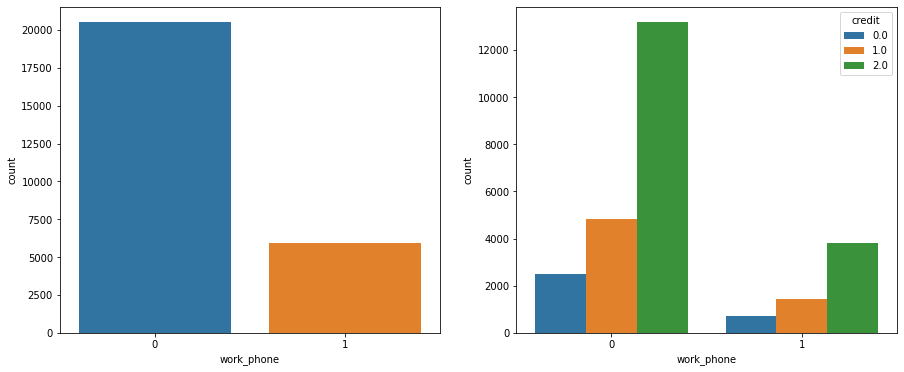

In [ ]:
fig = plt.figure(figsize=(15,6))
ax1 = plt.subplot(1,2,1)
sns.countplot(data=train_df, x="work_phone", ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.countplot(data=train_df, x="work_phone", hue='credit', ax=ax2)
plt.show()

### 14. phone

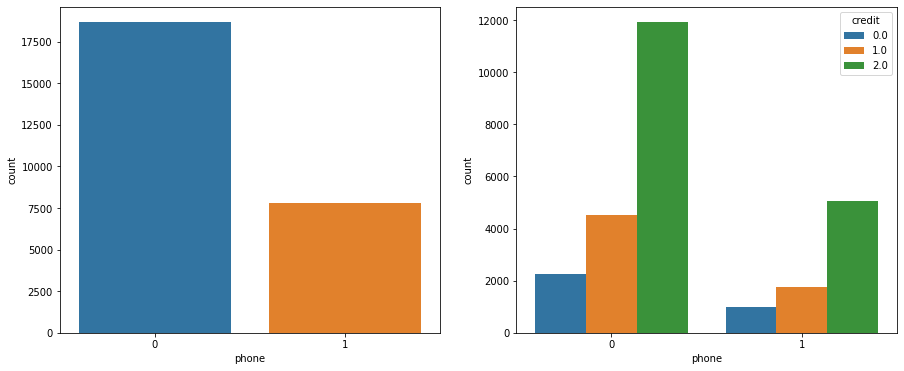

In [ ]:
fig = plt.figure(figsize=(15,6))
ax1 = plt.subplot(1,2,1)
sns.countplot(data=train_df, x="phone", ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.countplot(data=train_df, x="phone", hue='credit', ax=ax2)
plt.show()

### 15. email

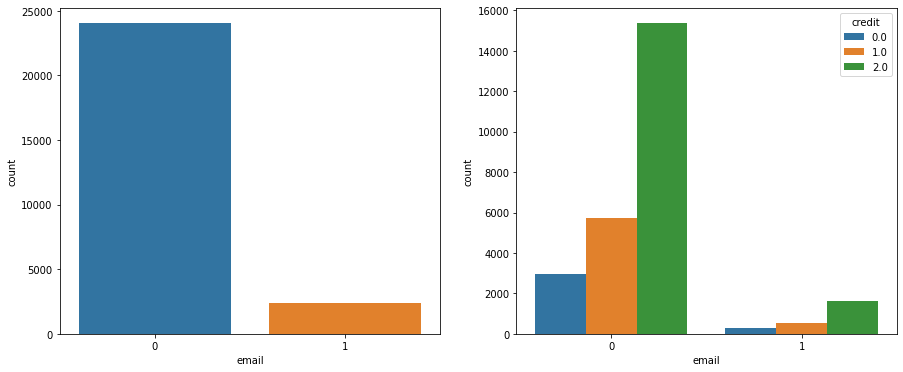

In [ ]:
fig = plt.figure(figsize=(15,6))
ax1 = plt.subplot(1,2,1)
sns.countplot(data=train_df, x="email", ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.countplot(data=train_df, x="email", hue='credit', ax=ax2)
plt.show()

### 16. occyp_type

In [ ]:
train_df['occyp_type'].unique()

array([nan, 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff'], dtype=object)

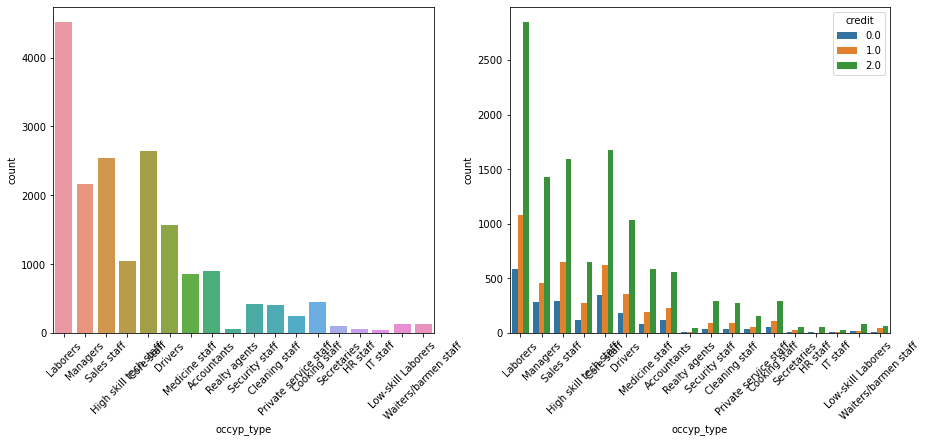

In [ ]:
fig = plt.figure(figsize=(15,6))
ax1 = plt.subplot(1,2,1)
sns.countplot(data=train_df, x="occyp_type", ax=ax1)
plt.xticks(rotation=45)
ax2 = plt.subplot(1,2,2)
sns.countplot(data=train_df, x="occyp_type", hue='credit', ax=ax2)
plt.xticks(rotation=45)
plt.show()

### 17. family_size

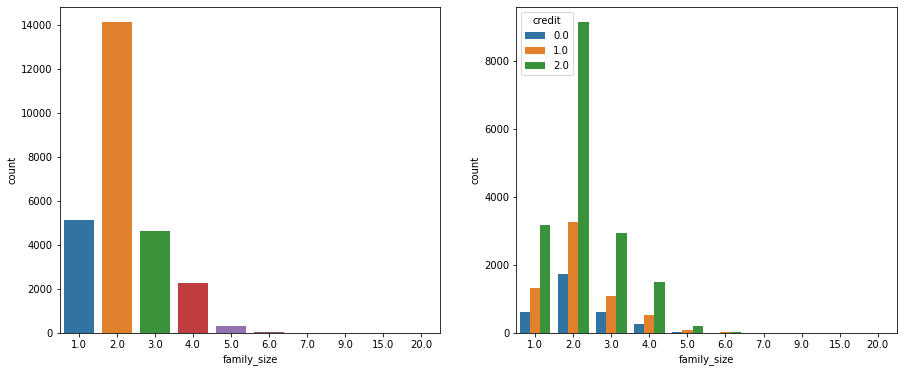

In [ ]:
fig = plt.figure(figsize=(15,6))
ax1 = plt.subplot(1,2,1)
sns.countplot(data=train_df, x="family_size", ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.countplot(data=train_df, x="family_size", hue='credit', ax=ax2)
plt.show()

### 18. begin_month

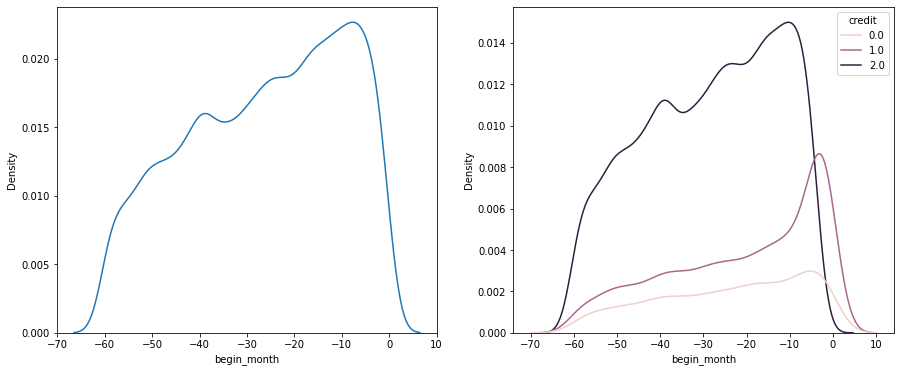

In [ ]:
fig = plt.figure(figsize=(15,6))
ax1 = plt.subplot(1,2,1)
sns.kdeplot(data=train_df, x="begin_month", ax=ax1,)
ax2 = plt.subplot(1,2,2)
sns.kdeplot(data=train_df, x="begin_month", hue='credit', ax=ax2)
plt.show()

### 19. credit

In [ ]:
train_df['credit'].value_counts()

2.0    16968
1.0     6267
0.0     3222
Name: credit, dtype: int64

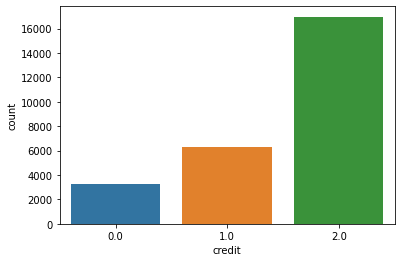

In [ ]:
sns.countplot(data=train_df, x="credit")

## 1-4. 상관관계 확인

### Heatmap
- index와 FLAG_MOBIL은 drop
- DAYS_BIRTH, DAYS_EMPLOYED, begin_month는 양수로 변경

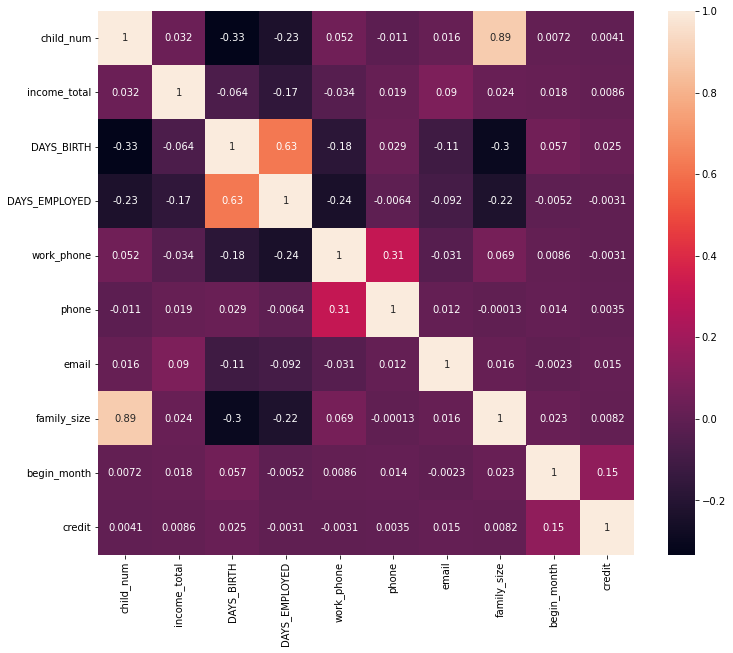

In [ ]:
heatmap_df = train_df.drop(['index','FLAG_MOBIL'], axis=1)
heatmap_df[['DAYS_BIRTH','DAYS_EMPLOYED','begin_month']] = abs(heatmap_df[['DAYS_BIRTH','DAYS_EMPLOYED','begin_month']])
fig = plt.figure(figsize=(12,10))
sns.heatmap(heatmap_df.corr(), annot=True)

In [ ]:
# credit과 유의미한 상관관계를 보이는 변수는 없어보임
# 자녀수가 많을수록 familysize가 커지는 경향
# 나이가 많을 수록 경력도 길어지는 경향

# 2. 전처리
- 결측치 처리
- 음수로 된 변수 양수로 변경(기간)
- 출생일, 업무시작일 월단위로 변경
- 이상치 처리
- 정규화 & label encoding

In [ ]:
train_credit = train_df.copy()
test_credit = test_df.copy()

## 2-1. 의미 없는 변수 제거
- index, FLAG_MOBIL
- FLAG MOBIL은 모두 1이기 때문에 의미가 없다고 판단

In [ ]:
train_credit.drop(['index', 'FLAG_MOBIL'], axis=1, inplace=True)
test_credit.drop(['index', 'FLAG_MOBIL'], axis=1, inplace=True)

## 2-2. DAYS_EMPLOYED
- 양수 값 0으로 변경


In [ ]:
train_credit['DAYS_EMPLOYED'] = train_credit['DAYS_EMPLOYED'].map(lambda x: 0 if x > 0 else x)
test_credit['DAYS_EMPLOYED'] = test_credit['DAYS_EMPLOYED'].map(lambda x: 0 if x > 0 else x)

## 2-3. 음수값 -> 양수 변경
DAYS_BIRTH, begin_month, DAYS_EMPLOYED

In [ ]:
neg_feats = ['DAYS_BIRTH', 'begin_month', 'DAYS_EMPLOYED']
for f in neg_feats:
    train_credit[f]=np.abs(train_credit[f])
    test_credit[f]=np.abs(test_credit[f])

## 2-4. 일 단위 -> 월 단위 파생변수 생성
- DAYS_BIRTH, DAYS_EMPLOYED => 30으로 나누어서 월 단위 변수 추가

In [ ]:
train_credit['DAYS_BIRTH_month'] = np.round((train_credit['DAYS_BIRTH']/365)*12).astype(int)
test_credit['DAYS_BIRTH_month'] = np.round((test_credit['DAYS_BIRTH']/365)*12).astype(int)

In [ ]:
train_credit['DAYS_EMPLOYED_month'] = np.round((train_credit['DAYS_EMPLOYED']/365)*12).astype(int)
test_credit['DAYS_EMPLOYED_month'] = np.round((test_credit['DAYS_EMPLOYED']/365)*12).astype(int)

## 2-5. 이상치 제거
- 자녀 수가 5명 이상인 경우에는 5명으로 통일

In [ ]:
train_credit['child_num'] = train_credit['child_num'].map(lambda x: 5 if x > 5 else x)
test_credit['child_num'] = test_credit['child_num'].map(lambda x: 5 if x > 5 else x)

## 2-6. Feature Drop
- 새롭게 생성한 파생변수와 다중공산성이 있는 변수 삭제

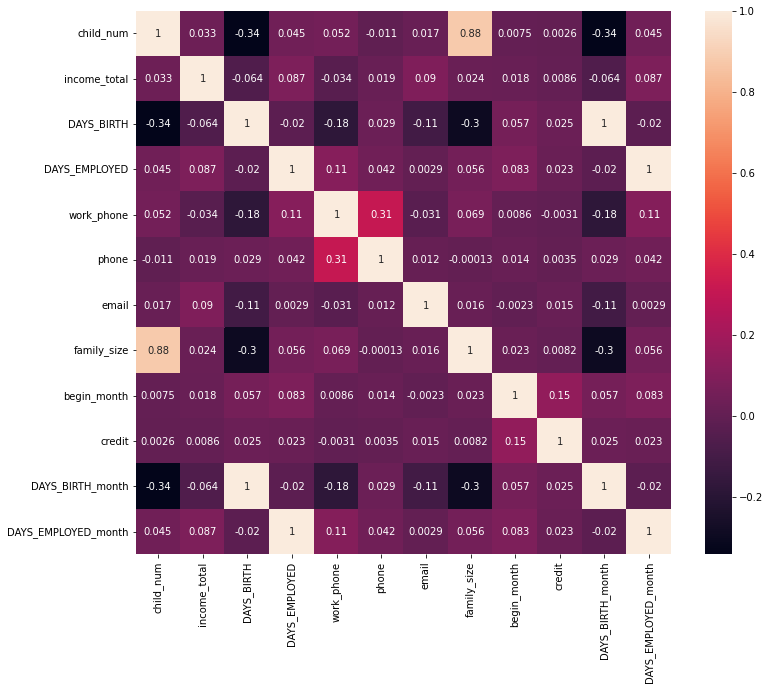

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(train_credit.corr(), annot=True)

In [ ]:
# redundant한 변수 drop
# child_num, DAYS_EMPLOYED,DAYS_BIRTH
train_credit.drop(['child_num','DAYS_EMPLOYED','DAYS_BIRTH'], axis=1, inplace=True)
test_credit.drop(['child_num','DAYS_EMPLOYED','DAYS_BIRTH'], axis=1, inplace=True)

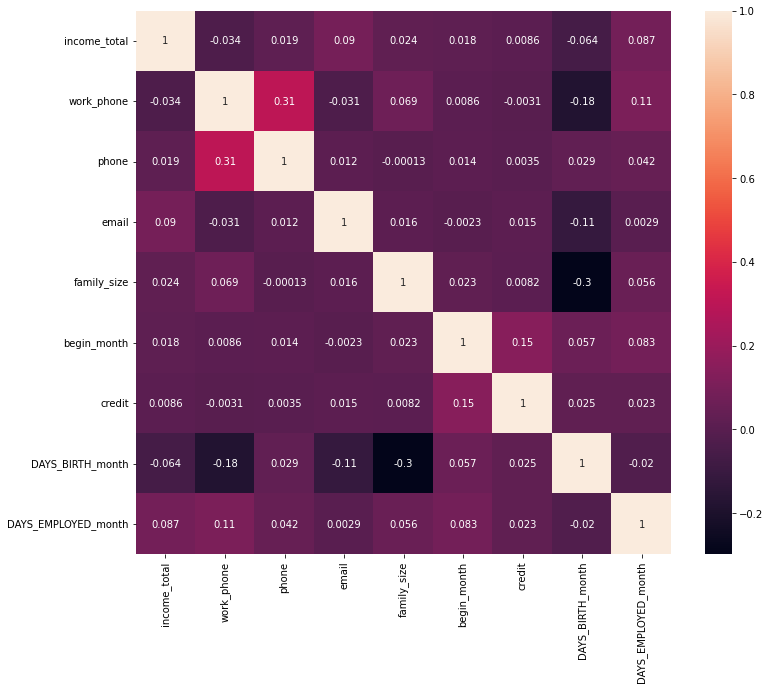

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(train_credit.corr(), annot=True)

## 2-7. 결측치 처리
- 'occyp_type'의 결측치 처리 필요
- datawig를 사용해서 결측치 대체
- 'occyp_type'과 연관이 있을 것이라고 판단한 'income_total', 'income type', 'edu_type'을 통해 결측치 처리

In [ ]:
imputer = datawig.SimpleImputer(
    input_columns=['income_total','income_type','edu_type'], 
    output_column='occyp_type', 
    output_path='imputer_model'
    )

In [ ]:
imputer.fit(train_df=train_credit, num_epochs=30)

In [ ]:
# 학습한 imputer을 통해 결측치 제거
train_credit_imputed = imputer.predict(train_credit)
test_credit_imputed = imputer.predict(test_credit)

In [ ]:
train_credit_imputed.head()

,gender,car,reality,income_total,income_type,edu_type,family_type,house_type,work_phone,phone,email,occyp_type,family_size,begin_month,credit,DAYS_BIRTH_month,DAYS_EMPLOYED_month,occyp_type_imputed,occyp_type_imputed_proba
0,0,0,0,0.149136,0,1,1,2,0,0,0,NaN,2.0,6.0,1.0,457,155,Managers,0.261211
1,0,0,1,0.590848,0,4,0,1,0,0,1,Laborers,3.0,5.0,1.0,374,51,Laborers,0.273371
2,1,1,1,2.578550,4,1,1,1,0,1,0,Managers,2.0,22.0,2.0,628,146,Managers,0.481164
3,0,0,1,0.149136,0,4,1,1,0,1,0,Sales staff,2.0,37.0,0.0,496,69,Laborers,0.277102
4,0,1,1,-0.292575,2,1,1,1,0,0,0,Managers,2.0,26.0,2.0,494,69,Core staff,0.451586


In [ ]:
test_credit_imputed.head()

In [ ]:
# 기존 "occyp_type" & 결측치 대체 확률 "occyp_type_imputed_proba" 열 삭제
train_credit_imputed.drop(['occyp_type', 'occyp_type_imputed_proba'], axis=1, inplace=True)
test_credit_imputed.drop(['occyp_type', 'occyp_type_imputed_proba'], axis=1, inplace=True)

## 2-8. Normalization & Encoding
수치형 데이터에 대해서는 정규화를 진행하였고, 범주형 데이터에 대해서는 label encoding을 진행하였다.

In [ ]:
num_cols = ['income_total','family_size','begin_month','DAYS_BIRTH_month','DAYS_EMPLOYED_month']
cat_cols = ['gender','car','reality','income_type','edu_type','family_type','house_type','work_phone','phone','email','occyp_type_imputed']
ignore_cols = ['credit']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
def get_values(value):
    return value.values.reshape(-1, 1)

for col in train_credit_imputed.columns:
  if col in ignore_cols:
    continue
  if col in num_cols:
      scaler = StandardScaler()
      train_credit_imputed[col] = scaler.fit_transform(get_values(train_credit_imputed[col]))
      test_credit_imputed[col] = scaler.transform(get_values(test_credit_imputed[col]))

  else:
      le = LabelEncoder()
      train_credit_imputed[col] = le.fit_transform(get_values(train_credit_imputed[col]))
      test_credit_imputed[col] = le.transform(get_values(test_credit_imputed[col]))

# 3. Feature Selection
- LGBMClassifier를 이용한 rfecv(Recursive Feature Elimination)기법 사용
- rfe의 경우, 사용자가 몇개의 feature를 선택할 것인지 선택해야하지만, rfecv는 k-fold cross validation을 통해 높은 성능을 가지는 feature 개수를 자동을 탐색

## 3-1. Feature Selection

In [ ]:
from sklearn.feature_selection import RFECV
from lightgbm import LGBMClassifier

In [ ]:
X_train = train_credit_imputed.drop(['credit'], axis=1)
y_train = train_credit_imputed['credit']
X_test = test_credit_imputed

In [ ]:
clf = LGBMClassifier(random_state=42, n_estimators=100, learning_rate=0.01)
select = RFECV(clf, step=1, cv = 10, scoring="neg_mean_squared_error")
select = select.fit(X_train, y_train)

In [ ]:
selected_columns = X_train.columns[select.support_]
selected_columns

Index(['gender', 'income_total', 'income_type', 'edu_type', 'family_type',
       'house_type', 'family_size', 'begin_month', 'DAYS_BIRTH_month',
       'DAYS_EMPLOYED_month', 'occyp_type_imputed'],
      dtype='object')

In [ ]:
X_train_select = select.transform(X_train)
X_test_select = select.transform(X_test)

print("X train:", X_train.shape)
print("X train select:", X_train_select.shape)

X train: (26457, 16)
X train select: (26457, 11)


Feature Selection
- X_train_select
- X_test_select
- y_train

<br>

Original
- X_train
- X_test
- y_train

In [ ]:
import pickle

In [ ]:
with open('/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/preprocess_data/X_train.pkl', 'wb') as f:
    pickle.dump(X_train, f)
with open('/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/preprocess_data/X_train_select.pkl', 'wb') as f:
    pickle.dump(X_train_select, f)
with open('/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/preprocess_data/y_train.pkl', 'wb') as f:
    pickle.dump(y_train, f)
  
with open('/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/preprocess_data/X_test.pkl', 'wb') as f:
    pickle.dump(X_test, f)
with open('/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/preprocess_data/X_test_select.pkl', 'wb') as f:
    pickle.dump(X_test_select, f)

# 4. Model Selection
Feature selection 수행한 dataset과 하지 않은 Original dataset 모두 사용
### 사용 모델
- Logistic Regression
- Random Forest Classifier
- Decision Tree Classifier
- CatBoost
- Voting : Logistic Regression & Random Forest & Decision Tree & CatBoost

<br>

각 model들의 parameter는 gridsearch를 통해 최적 parameter를 유추하였다. 그러나 Catboost에서 grid search를 사용할떄 계속 error가 발생해서, 함수를 만들어서 직접 parameter에 따른 성능을 확인했다.

학습 과정에서는 Stratified 10 fold cross validation을 사용했다.

Voting의 경우에는 soft voting을 사용했다.

Support Vector Classifier도 사용해보고자 했으나, 학습 시간이 너무 오래 걸려서(5시간 이상) 여러번 시도해볼 수 없었기에 사용하지 못했다. 


In [ ]:
with open('/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/preprocess_data/X_train.pkl', 'rb') as f:
     X_train = pickle.load(f)
with open('/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/preprocess_data/X_train_select.pkl', 'rb') as f:
     X_train_select = pickle.load(f)
with open('/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/preprocess_data/y_train.pkl', 'rb') as f:
     y_train = pickle.load(f)
     
with open('/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/preprocess_data/X_test.pkl', 'rb') as f:
     X_test = pickle.load(f)
with open('/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/preprocess_data/X_test_select.pkl', 'rb') as f:
     X_test_select = pickle.load(f)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

scv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split

X_tra, X_val, y_tra, y_val = train_test_split(X_train, y_train, random_state=42)
X_tra_s, X_val_s, y_tra_s, y_val_s = train_test_split(X_train_select, y_train, random_state=42)

In [ ]:
# 모델 저장을 위한 joblib
import joblib

## 4-1. Lositic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

### Original Data

In [ ]:
LR = LogisticRegression()
lr_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

In [ ]:
LR_clf = GridSearchCV(LR, lr_params, cv = scv)
LR_clf.fit(X_tra, y_tra)

In [ ]:
print("best parameters ",LR_clf.best_params_)
print("best score :",LR_clf.best_score_)

best parameters  {'C': 0.1, 'penalty': 'l2'}
best score : 0.6447435402616398


In [ ]:
lr_best = LR_clf.best_estimator_

In [ ]:
print("score : ",accuracy_score(y_val, lr_best.predict(X_val)))

score :  0.6335600907029478


In [ ]:
joblib.dump(lr_best,'/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/model/lr_best.pkl' )

['/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/model/lr_best.pkl']

### Feature Selection 적용 Data

In [ ]:
LR = LogisticRegression()
lr_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

In [ ]:
LR_s_clf = GridSearchCV(LR, lr_params, cv = scv)
LR_s_clf.fit(X_tra_s, y_tra_s)

In [ ]:
print("best parameters ",LR_s_clf.best_params_)
print("best score :",LR_s_clf.best_score_)

best parameters  {'C': 0.1, 'penalty': 'l2'}
best score : 0.6446427338100269


In [ ]:
lr_s_best = LR_s_clf.best_estimator_

In [ ]:
print("score : ",accuracy_score(y_val_s, lr_s_best.predict(X_val_s)))

score :  0.6332577475434619


In [ ]:
joblib.dump(lr_s_best,'/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/model/lr_s_best.pkl' )

['/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/model/lr_s_best.pkl']

## 4-2. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

### Original Data

In [ ]:
RFC = RandomForestClassifier()
rfc_params = {
    'n_estimators' : [10, 30, 50, 100, 200, 300],
    'max_depth' : [10, 30, 50, 100, 150, 300, 500],
    'min_samples_leaf' : [3, 8, 12, 18],
    }

In [ ]:
RF_clf = GridSearchCV(RFC, rfc_params, cv = scv)
RF_clf.fit(X_tra, y_tra)

In [ ]:
print("best parameters ",RF_clf.best_params_)
print("best score :",RF_clf.best_score_)

best parameters  {'max_depth': 30, 'min_samples_leaf': 3, 'n_estimators': 200}
best score : 0.7141416978142521


In [ ]:
RF_best = RF_clf.best_estimator_

In [ ]:
print("score : ",accuracy_score(y_val, RF_best.predict(X_val)))

score :  0.7064247921390778


In [ ]:
joblib.dump(RF_best,'/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/model/RF_best.pkl' )

['/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/model/RF_best.pkl']

### Feature Selection 적용 Data

In [ ]:
RFC = RandomForestClassifier()
rfc_params = {
    'n_estimators' : [10, 30, 50, 100, 200, 300],
    'max_depth' : [10, 30, 50, 100, 150, 300, 500],
    'min_samples_leaf' : [3, 8, 12, 18],
    }

In [ ]:
RF_s_clf = GridSearchCV(RFC, rfc_params, cv = scv)
RF_s_clf.fit(X_tra_s, y_tra_s)

In [ ]:
print("best parameters ",RF_s_clf.best_params_)
print("best score :",RF_s_clf.best_score_)

best parameters  {'max_depth': 150, 'min_samples_leaf': 3, 'n_estimators': 50}
best score : 0.7113697489233769


In [ ]:
RF_s_best = RF_s_clf.best_estimator_

In [ ]:
print("score : ",accuracy_score(y_val_s, RF_s_best.predict(X_val_s)))

score :  0.7002267573696145


In [ ]:
joblib.dump(RF_s_best,'/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/model/RF_s_best.pkl' )

['/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/model/RF_s_best.pkl']

## 4-3. Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

### Original Data

In [ ]:
DT = DecisionTreeClassifier(random_state=42)
dt_params = {
    'max_depth':[3,7,10,15,30],
    'min_samples_leaf' : [1,3,5,10]
    }

In [ ]:
DT_clf = GridSearchCV(DT, dt_params, cv = scv)
DT_clf.fit(X_tra, y_tra)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 7, 10, 15, 30],
                         'min_samples_leaf': [1, 3, 5, 10]})

In [ ]:
print("best parameters ",DT_clf.best_params_)
print("best score :",DT_clf.best_score_)

best parameters  {'max_depth': 3, 'min_samples_leaf': 1}
best score : 0.6911099628260339


In [ ]:
DT_best = DT_clf.best_estimator_

In [ ]:
print("score : ",accuracy_score(y_val, DT_best.predict(X_val)))

score :  0.6829931972789116


In [ ]:
joblib.dump(DT_best,'/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/model/DT_best.pkl' )

['/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/model/DT_best.pkl']

### Feature Selection 적용 Data

In [ ]:
DT = DecisionTreeClassifier(random_state=42)
dt_params = {
    'max_depth':[3,7,10,15,30],
    'min_samples_leaf' : [1,3,5,10]
    }

In [ ]:
DT_s_clf = GridSearchCV(DT, dt_params, cv = scv)
DT_s_clf.fit(X_tra_s, y_tra_s)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 7, 10, 15, 30],
                         'min_samples_leaf': [1, 3, 5, 10]})

In [ ]:
print("best parameters ",DT_s_clf.best_params_)
print("best score :",DT_s_clf.best_score_)

best parameters  {'max_depth': 3, 'min_samples_leaf': 1}
best score : 0.6911099628260339


In [ ]:
DT_s_best = DT_s_clf.best_estimator_

In [ ]:
print("score : ",accuracy_score(y_val_s, DT_s_best.predict(X_val_s)))

score :  0.6829931972789116


In [ ]:
joblib.dump(DT_s_best,'/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/model/DT_s_best.pkl' )

['/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/model/DT_s_best.pkl']

## 4-4. Catboost

In [ ]:
! pip install catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
from tqdm import tqdm

In [ ]:
def catboost_avgscore(X,y,l2_leaf_reg, depth, learning_rate):
  kfold_accuracy_history = []
  for train_index, valid_index in tqdm(scv.split(X, y)): 

      y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
      X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]

      model = CatBoostClassifier(l2_leaf_reg = l2_leaf_reg , depth=depth, iterations=3000,
                                 early_stopping_rounds= 150, learning_rate=learning_rate, random_seed=42)
      model.fit(X_train, y_train, eval_set =[(X_train, y_train), (X_valid, y_valid)], use_best_model=True, verbose=False)

      pred = model.predict(X_valid)
      kfold_accuracy_history.append(accuracy_score(pred, y_valid)) 

  score = np.mean(kfold_accuracy_history)
  print('Validation Accuracy : ',score,'\n') 
  return score

### Original Data

In [ ]:
reg = [5,10,15]
dep = [4,7,10]
lr = [0.01,0.1]

summary=[] # parameter 별 성능을 저장할 list 생성
for r in reg:
  for d in dep: 
    for l in lr:
      score = catboost_avgscore(X_tra, y_tra, r,d,l) # 10 fold crossvalidation을 train, validation score 출력
      summary.append([r,d,l,score]) # 각 parameter의 값과 성능을 저장

In [ ]:
sc = [i[3] for i in summary]
best_index = sc.index(max(sc))

para = summary[best_index]

reg = para[0]
dep = para[1]
lra = para[2]
print(reg, dep, lra)

5 10 0.01


In [ ]:
CB_best = CatBoostClassifier(l2_leaf_reg = reg , depth=dep, iterations=10000, early_stopping_rounds= 1500, learning_rate=lra, random_seed=42)
CB_best.fit(X_tra, y_tra)

In [ ]:
print("score : ",accuracy_score(y_val, CB_best.predict(X_val)))

score :  0.7026455026455026


In [ ]:
joblib.dump(CB_best,'/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/model/CB_best.pkl' )

['/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/model/CB_best.pkl']

### Feature Selection 적용 Data

In [ ]:
def catboost_avgscore_select(X,y,l2_leaf_reg, depth, learning_rate):
  kfold_accuracy_history = []
  for train_index, valid_index in tqdm(scv.split(X, y)):

      y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
      X_train, X_valid = X[train_index], X[valid_index]

      model = CatBoostClassifier(l2_leaf_reg = l2_leaf_reg , depth=depth, iterations=3000, early_stopping_rounds= 150, learning_rate=learning_rate, random_seed=42)
      model.fit(X_train, y_train, eval_set =[(X_train, y_train), (X_valid, y_valid)], use_best_model=True, verbose=False)

      pred = model.predict(X_valid)
      kfold_accuracy_history.append(accuracy_score(pred, y_valid)) 

  score = np.mean(kfold_accuracy_history)
  print('Validation Accuracy : ',score,'\n') 
  return score

In [ ]:
reg = [5,10,15]
dep = [4,7,10]
lr = [0.01,0.1]

summary=[]
for r in reg:
  for d in dep: 
    for l in lr:
      score = catboost_avgscore_select(X_tra_s, y_tra_s, r,d,l)
      summary.append([r,d,l,score])

In [ ]:
sc = [i[3] for i in summary]
best_index = sc.index(max(sc))

para = summary[best_index]

reg = para[0]
dep = para[1]
lra = para[2]
print(reg, dep, lra)

5 7 0.1


In [ ]:
CB_s_best = CatBoostClassifier(l2_leaf_reg = reg , depth=dep, iterations=10000, early_stopping_rounds= 1500, learning_rate=lra, random_seed=42)
CB_s_best.fit(X_tra_s, y_tra_s)

In [ ]:
print("score : ",accuracy_score(y_val_s, CB_s_best.predict(X_val_s)))

score :  0.6820861678004535


In [ ]:
joblib.dump(CB_s_best,'/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/model/CB_s_best.pkl' )

['/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/model/CB_s_best.pkl']

## 4-5. Voting

In [ ]:
from sklearn.ensemble import VotingClassifier

### Original Data

In [ ]:
lr_best = joblib.load('/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/model/lr_best.pkl')
RF_best = joblib.load('/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/model/RF_best.pkl')
DT_best = joblib.load('/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/model/DT_best.pkl')
CB_best = joblib.load('/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/model/CB_best.pkl')

In [ ]:
clf = [['Logistic Regression', lr_best],
       ['RandomForest',  RF_best],
       ['Decision Tree Classifier', DT_best],
       ['Cat Boost', CB_best]]

soft_voting = VotingClassifier(clf, voting='soft')

In [ ]:
soft_voting.fit(X_tra, y_tra)

In [ ]:
print("score : ",accuracy_score(y_val, soft_voting.predict(X_val)))

score :  0.6952380952380952


In [ ]:
joblib.dump(soft_voting,'/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/soft_voting.pkl' )

['/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/soft_voting.pkl']

### Feature Selection 적용 Data

In [ ]:
lr_s_best = joblib.load('/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/model/lr_s_best.pkl')
RF_s_best = joblib.load('/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/model/RF_s_best.pkl')
DT_s_best = joblib.load('/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/model/DT_s_best.pkl')
CB_s_best = joblib.load('/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/model/CB_s_best.pkl')

In [ ]:
clf_s = [['Logistic Regression', lr_s_best],
       ['RandomForest',  RF_s_best],
       ['Decision Tree Classifier', DT_s_best],
       ['Cat Boost', CB_s_best]]

soft_voting_s = VotingClassifier(clf_s, voting='soft')

In [ ]:
soft_voting_s.fit(X_tra_s, y_tra_s)

In [ ]:
print("score : ",accuracy_score(y_val_s, soft_voting_s.predict(X_val_s)))

score :  0.6929705215419502


In [ ]:
joblib.dump(soft_voting_s,'/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/soft_voting_s.pkl' )

['/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/soft_voting_s.pkl']

# 5. 결과
Logistic Regression, Decision Tree, Random Forest, CatBoost, Voting의 총 5가지 모델을 비교해본 결과, Original Data와 Feature Selection을 진행한 Data 모두에 대해 Validation Score이 가장 높았던 모델은 Random Forest였다.

<br>

따라서 Test Set에 대해서 Random Forest와 Voting을 모두 시도해보았다.

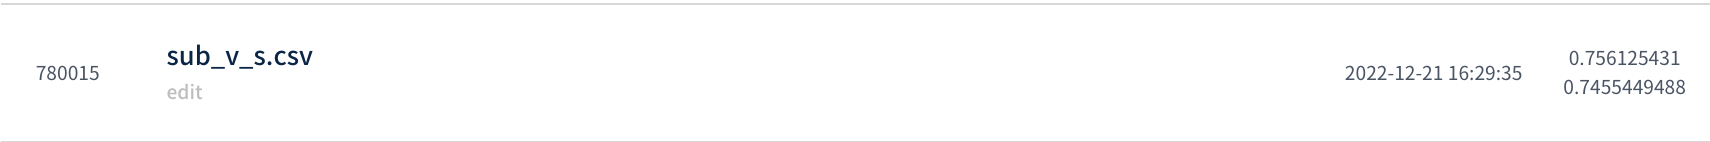

Dacon에 제출해서 확인해본 결과, feature selection을 진행한 voting 모델의 점수가 가장 높았다. 여러개의 모델을 함께 사용하는 Voting의 generalization 성능이 더 높았기 때문이라고 유추할 수 있다.
그러나, Dacon에서 하루 제출 횟수가 3회로 제한되어있어서, 다 다양한 시도에 대한 test score를 확인하지 못한 아쉬움이 있다.


<br>

또한, Decision Tree와 이를 ensemble한 random forest 사이에서의 성능차이도 확실하게 볼 수 있었다. 

<br>

Feature Selection의 진행 유무는 대부분의 model에서 성능에 큰 영향을 끼치지는 못했다. 그러나 CatBoost에서는 Validation Score이 0.702, 0.682 정도로 Original Data의 성능이 좋았다. 이는 Categorical Data에 좋은 성능을 보이는 Catboost에서, feature의 개수가 줄어들어서 정보 손실이 발생했음을 유추할 수 있었다. Catboost 이외의 model에서도 모두 Original data에 대한 accuracy score이 더 높았는데, 이도 마찬가지로 feature drop 과정에서 정보 손실이 있었던 것으로 보인다.



In [ ]:
# random forest
y_pred_RF = RF_best.predict_proba(X_test)
y_pred_RF_s = RF_s_best.predict_proba(X_test_select)

# voting
y_pred_v = soft_voting.predict_proba(X_test)
y_pred_v_s = soft_voting_s.predict_proba(X_test_select)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
sub_rf = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/open/sample_submission.csv')
sub_rf_s = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/open/sample_submission.csv')

sub_v = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/open/sample_submission.csv')
sub_v_s = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/open/sample_submission.csv')

In [ ]:
sub_rf.iloc[:,1:] = y_pred_RF
sub_rf_s.iloc[:,1:] = y_pred_RF_s
sub_v.iloc[:,1:] = y_pred_v
sub_v_s.iloc[:,1:] = y_pred_v_s

In [ ]:
sub_rf.to_csv('/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/sub_rf.csv', index=False)
sub_rf_s.to_csv('/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/sub_rf_s.csv', index=False)

sub_v.to_csv('/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/sub_v.csv', index=False)
sub_v_s.to_csv('/content/drive/MyDrive/Colab_Notebooks/2022_2 고려대학교/기계학습_termproject/sub_v_s.csv', index=False)